In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# save the zip file name as "BraTS2020_Data.zip"
!unzip /content/drive/MyDrive/BraTS2020_h5_Data_v6.zip

Archive:  /content/drive/MyDrive/BraTS2020_h5_Data_v6.zip
   creating: content/BraTS2020_h5_Data_v6/
   creating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_013_slice_091.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_011_slice_075.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_013_slice_064.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_011_slice_020.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_012_slice_082.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_013_slice_008.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_012_slice_070.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/BraTS20_Test_013_slice_053.h5  
  inflating: content/BraTS2020_h5_Data_v6/BraTS2020_TestData_h5/Br

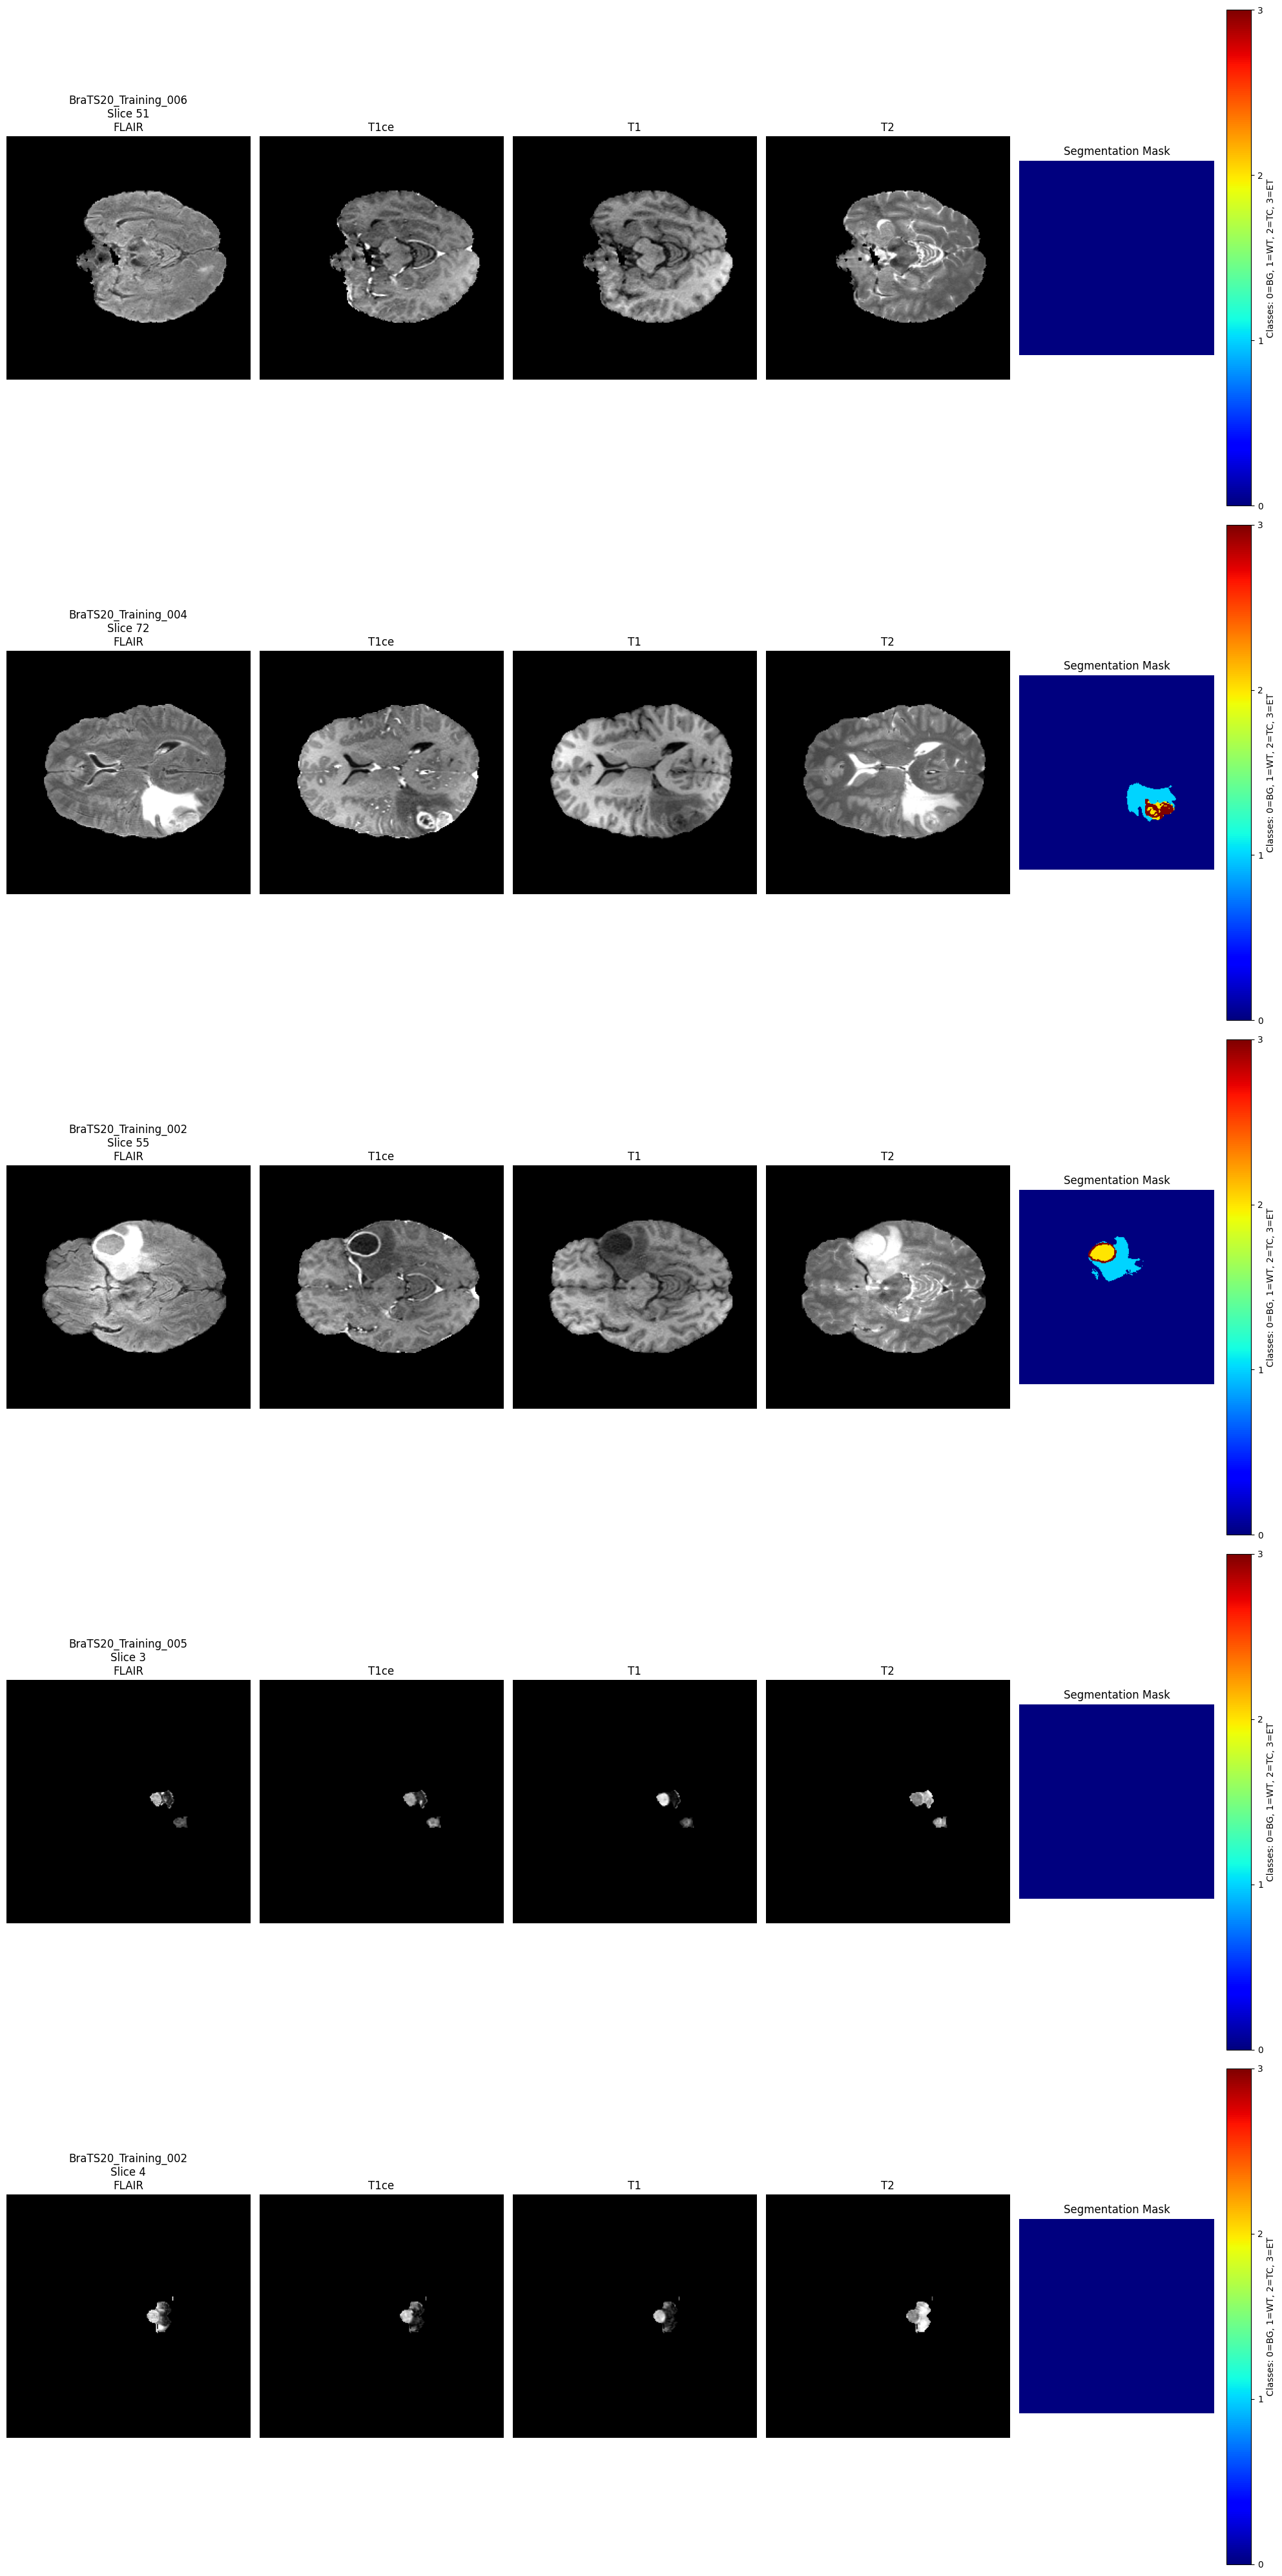

In [6]:
import os
import random
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Path to your HDF5 files
path_to_output = '/content/content/BraTS2020_h5_Data_v6/BraTS2020_TrainData_h5'
base_name = 'BraTS20_Training_'

# Get all available files (now each file contains both slice and mask)
all_files = [f for f in os.listdir(path_to_output) if f.endswith('.h5')]

# Select 5 random samples to visualize
num_samples = 5
random_samples = random.sample(range(len(all_files)), num_samples)

# Create a figure for visualization
plt.figure(figsize=(20, 8*num_samples))

for i, sample_idx in enumerate(random_samples):
    h5_file = all_files[sample_idx]

    # Get patient ID and slice number from filename
    parts = h5_file.split('_')
    patient_id = '_'.join(parts[:3])  # e.g., 'BraTS20_Training_001'
    slice_num = int(parts[-1].split('.')[0])  # e.g., '0' from 'slice_0.h5'

    # Load the data from single HDF5 file
    with h5py.File(os.path.join(path_to_output, h5_file), 'r') as hf:
        slice_data = hf['slice'][:]  # shape (240, 240, 4)
        mask_data = hf['mask'][:]    # shape (240, 240, 3)

    # Get the four modalities
    flair = slice_data[:, :, 0]
    t1ce = slice_data[:, :, 1]
    t1 = slice_data[:, :, 2]
    t2 = slice_data[:, :, 3]

    # Create combined mask for visualization (combines the 3 channels)
    # Channel 0: Whole tumor (1)
    # Channel 1: Tumor core (2)
    # Channel 2: Enhancing tumor (3)
    combined_mask = np.zeros(mask_data.shape[:2], dtype=np.uint8)
    combined_mask[mask_data[:, :, 2] > 0] = 3  # Enhancing tumor
    combined_mask[(mask_data[:, :, 1] > 0) & (combined_mask == 0)] = 2  # Tumor core
    combined_mask[(mask_data[:, :, 0] > 0) & (combined_mask == 0)] = 1  # Whole tumor

    # Plot the modalities and mask
    plt.subplot(num_samples, 5, i*5 + 1)
    plt.imshow(flair, cmap='gray')
    plt.title(f'{patient_id}\nSlice {slice_num}\nFLAIR')
    plt.axis('off')

    plt.subplot(num_samples, 5, i*5 + 2)
    plt.imshow(t1ce, cmap='gray')
    plt.title('T1ce')
    plt.axis('off')

    plt.subplot(num_samples, 5, i*5 + 3)
    plt.imshow(t1, cmap='gray')
    plt.title('T1')
    plt.axis('off')

    plt.subplot(num_samples, 5, i*5 + 4)
    plt.imshow(t2, cmap='gray')
    plt.title('T2')
    plt.axis('off')

    # Plot the mask with different colors for each class
    plt.subplot(num_samples, 5, i*5 + 5)
    plt.imshow(combined_mask, cmap='jet', vmin=0, vmax=3)
    plt.title('Segmentation Mask')
    plt.axis('off')
    plt.colorbar(ticks=[0, 1, 2, 3],
                label='Classes: 0=BG, 1=WT, 2=TC, 3=ET')

plt.tight_layout()
plt.show()